In [12]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = [14, 8]

In [4]:
data_example = pd.read_csv('https://raw.githubusercontent.com/kamiloster/online_changepoints/master/test_data.csv').to_numpy()

---

# Theory

---

Let's consider a time series: <i> t = 1, 2, ..., N </i>, with robability distribution: $\theta$ ($\mu$, $\sigma ^2$), $\mu$ is mean, $\sigma$ is standard deviation, thus $\sigma ^2$ is variance of the distribution. Assumption: our data are normal distributed. Change point is occurring at time: t = $\tau$.

In this case, we consider two hypotheses:

Null hypothesis (no change point) $H_0: \theta_1 = \theta_2 = ... = \theta_{N-1} = \theta_N$

Alternative hypothesis (change point) $H_1: \theta_1 = \theta_2 = ... = \theta_{\tau-1} = \theta_\tau \neq \theta_{\tau+1} = \theta_{\tau+2} = ... = \theta_{N-1} = \theta_N$

Likelihood: probability of observing the data that we have for $H_0$. A measure of how good the hypothesis is: higher likelihood - stronger $H_0$ hypothesis.

Likelihood for $H_0$:
$\mathcal{L}(H_0) = p(x|H_0) = \prod_{i=t_0}^{N} p(x_i|\theta_0) $

Likelihood for $H_1$:
$\mathcal{L}(H_1) = p(x|H_1) = \prod_{i=t_0}^{\tau} p(x_i|\theta_1) \prod_{j = \tau + 1}^{N} p(x_j|\theta_2) $

Define log-likelihood ratio:
$\mathcal{R} _\tau = \log \left( \frac{\mathcal{L}_{H_1}}{\mathcal{L}_{H_0}} \right) = \sum_{i = 1}^{\tau} \log p(x_i|\theta_1) + \sum_{j = \tau + 1}^{N} \log p(x_j|\theta_2) + \sum_{k = 1}^{N} \log p(x_k|\theta_0)$

The above case has the following assumptions:
* offline approach
* only one change point

This can be easily modified into online approach. The newly added data point will be $\tau + 1$, and the following will test whether the last point before new point is changepoint:

$\mathcal{R} _\tau = \log \left( \frac{\mathcal{L}_{H_1}}{\mathcal{L}_{H_0}} \right) = \sum_{i = 1}^{\tau} \log p(x_i|\theta_1) + \sum_{j = \tau + 1}^{N} \log p(x_j|\theta_2)$

Since $\tau$ is not known, generalised log-likelihood ratio G, which is the maximum of $\mathcal{R} _\tau$, for all possible $\tau$:

$G = \max\limits_{1 \leq \tau \leq N} \mathcal{R} _\tau$

For:

$H_O: \tau^* = arg\max\limits_{1 \leq \tau \leq N} \mathcal{R} _\tau$

$H_0$ is rejected for sufficiently large G, for example critical value $\lambda^*$:

$2G = 2R(\tau^*) > \lambda^*$

The problem is with defining $\lambda^*$, also called penalty factor. Some of the methods:
* BIC (Bayesian Information Criterion)
* MBIC (Modified Bayesian Information Criterion) 
* AIC (Akaike Information Criterion)
* Hannan-Quinn

The first assumption regarding the data is their distribution. For example normally distributed random variables can be represented as:

$f(x|\mu, \sigma) = \frac{1}{\sqrt{2\pi \sigma^2}} e ^{- \left( x - \mu \right) ^2 / 2\sigma ^2}$

A change point can be considered from two perspectives: a change in mean, $\mu$, and change in variance, $\sigma^2$. Before change point - $\mu_1$, after change point - $\mu_2$, and global mean - $\mu_0$.

For null hypothesis:

$\mathcal{L} _{H_0} = \frac{1}{\sqrt{2\pi \sigma^{2N}}} \prod_{i = 1} ^ N \exp \left[ - \frac{ \left(x_i - \mu_0\right)^2} {2 \sigma ^2}\right] $

and alternative hypothesis:

$\mathcal{L} _{H_1} = \frac{1}{\sqrt{2\pi \sigma^{2N}}} \prod_{i = 1} ^ \tau \exp \left[ - \frac{ \left(x_i - \mu_1\right)^2} {2 \sigma ^2}\right] \prod_{j = \tau + 1} ^ N \exp \left[ - \frac{ \left(x_j - \mu_2\right)^2} {2 \sigma ^2}\right] $

Hence, $\mathcal{R} _\tau$ is:

$\mathcal{R}_\tau = \log \left( \frac{\mathcal{L} _{H_1}}{\mathcal{L} _{H_0}} \right) = - \frac{1}{2\sigma^2} \left[ \sum _{i = 1} ^ \tau \left( x_i - \mu_1 \right)^2 + \sum _{j = \tau + 1} ^ N \left( x_j - \mu_2 \right)^2 - \sum _{k = 1} ^ N \left( x_k - \mu_0 \right)^2\right]$

If $\sum _{k = 1} ^ N \left( x_k - \mu_0 \right)^2 > \sum _{i = 1} ^ \tau \left( x_i - \mu_1 \right)^2 + \sum _{j = \tau + 1} ^ N \left( x_j - \mu_2 \right)^2 $, $\mathcal{R}_\tau$ is negative. Otherwise, $\mathcal{R}_\tau$ is positive. In terms of online change point detection, positive $\mathcal{R}_\tau$ are an equivalent to steady-state conditions in their normal distribution mean. At the change point, a change in the sign of $\mathcal{R}_\tau$ can be expected.

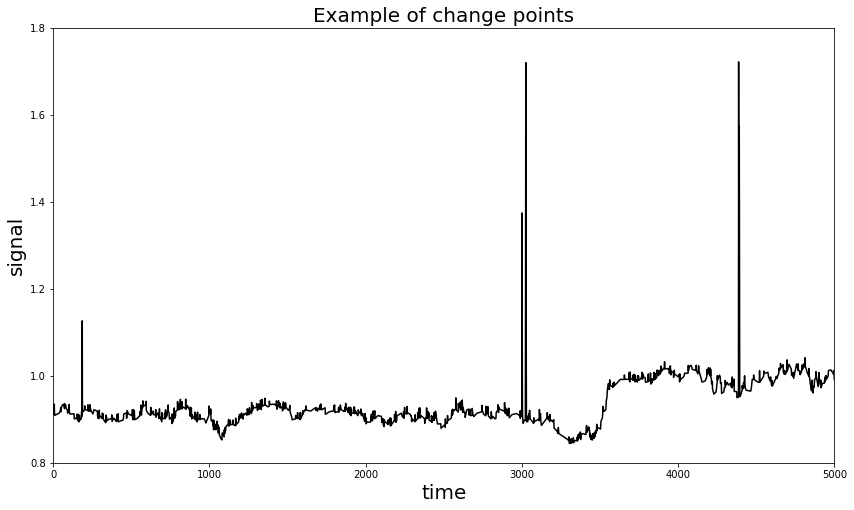

In [22]:
plt.plot(data_example[:5000, 0], color = 'black')
#plt.axvline(x = 3600, color = 'red')
#plt.axvline(x = 9450, color = 'red')
plt.ylabel('signal', {'fontsize': 20})
plt.xlabel('time', {'fontsize': 20})
plt.title('Example of change points', {'fontsize': 20})
plt.xlim((0, len(data_example[:5000, 0])))
plt.ylim((0.8, 1.8))

plt.show()

---

# Off-line search with global maximum log-likelihood

---

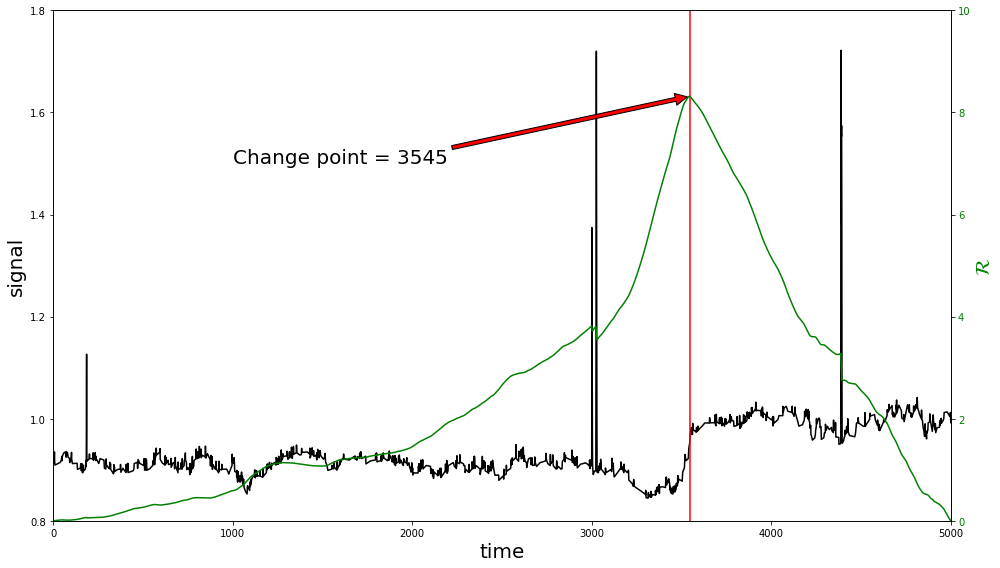

In [44]:
data = data_example[:5000, 0]

mu0 = np.mean(data)
n = len(data)
s0 = [np.sum((data - mu0) ** 2)] * (n-1)
s1 = np.asarray([np.sum((data[0:i]-np.mean(data[0:i])) ** 2) for i in range(1,n)])
s2 = np.asarray([np.sum((data[i:]-np.mean(data[i:])) ** 2) for i in range(1,n)])
R  = s0-s1-s2
G  = np.max(R)
taustar = int(np.where(R == G)[0]) + 1

fig, ax1 = plt.subplots()
ax1.set_xlabel('time', 
               {'fontsize': 20}
              )

ax1.set_ylabel('signal', 
               {'fontsize': 20}, 
               color = 'black'
              )

ax1.plot(np.arange(0, len(data)), 
         data, 
         color = 'black'
        )

ax1.tick_params(axis='y', 
                labelcolor = 'black'
               )

ax1.axvline(x = taustar, 
            color = 'red'
           )

plt.xlim((0, len(data)))
plt.ylim((0.8, 1.8))

ax2 = ax1.twinx()
ax2.set_ylabel('$ \mathcal{R} $', 
               {'fontsize': 20}, 
               color = 'green'
              )

ax2.plot(np.arange(0, len(R)), 
         R, 
         color = 'green'
        )

ax2.tick_params(axis = 'y', 
                labelcolor = 'green'
               )

ax2.annotate('Change point = %i' %(taustar), 
             xy = (taustar, G), 
             xytext = (1000, 7), 
             arrowprops = dict(facecolor = 'red', 
                             shrink = 0.01), 
             fontsize = 20
            )

plt.xlim((0, len(data)))
plt.ylim((0, 10))

fig.tight_layout()
plt.show()

---

# Online search of all change points

---

In [55]:
changepoints = pd.read_csv('https://raw.githubusercontent.com/kamiloster/online_changepoints/master/output_changepoints.csv').to_numpy()
smooth = pd.read_csv('https://raw.githubusercontent.com/kamiloster/online_changepoints/master/output_smooth.csv').to_numpy()

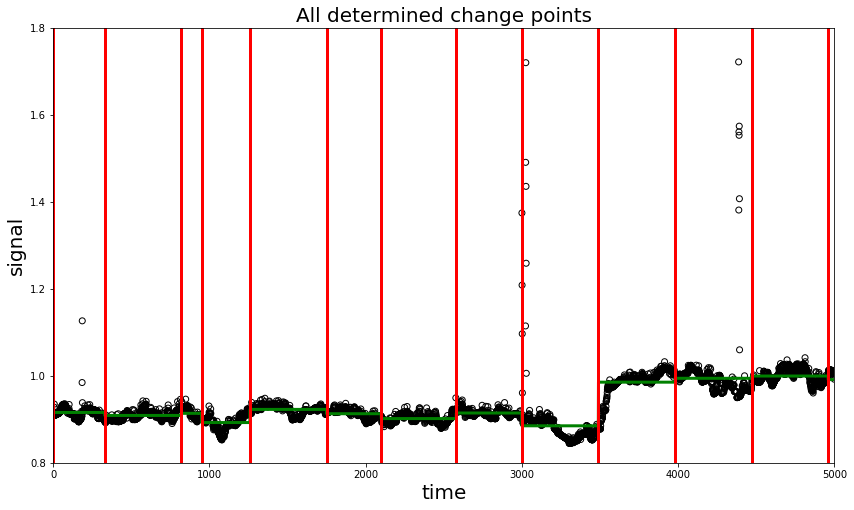

In [58]:
data = data_example[:5000, 0]
data_smooth = smooth[:5000, 1]
data_changepoints = changepoints[:, 1]

plt.scatter(np.arange(0, len(data)), data, facecolors='none', edgecolors='black', label = 'original data')

plt.plot(data_smooth, color = 'green', linewidth=3.0)

for value in data_changepoints:
    plt.axvline(x = value, color = 'red', linewidth=3.0)
    
plt.ylabel('signal', {'fontsize': 20})
plt.xlabel('time', {'fontsize': 20})

plt.title('All determined change points', {'fontsize': 20})

plt.xlim((0, len(data)))
plt.ylim((0.8, 1.8))

plt.show()